In [51]:
# vars
DSE_URL = "https://dsebd.org/"
DSE_ALT_URL = "https://dsebd.com.bd/"

DSE_LSP_URL = "latest_share_price_scroll_l.php"
DSE_DEA_URL = "day_end_archive.php"
DSE_AGM_URL = "Company_AGM.htm"
DSE_LPE_URL = "latest_PE_all.php"
DSE_LPE_URL_2 = "latest_PE.php"
DSE_NEWS_URL = "old_news.php"
DSE_CLOSE_PRICE_URL = "dse_close_price_archive.php"
DSE_COMPANY_LIST_URL = "company_listing.php"

DSE_MARKET_INF_URL = "recent_market_information.php"
DSE_MARKET_INF_MORE_URL = "recent_market_information_more.php"
DSE_MARKET_DEPTH_URL = "ajax/load-instrument.php"

DSEX_INDEX_VALUE = "dseX_share.php"

CSE_URL = "https://www.cse.com.bd/"
CSE_LSP_URL = "market/current_price"

In [3]:
import pandas as pd
import bdshare as ds
import os


class Store(object):

    def __init__(self, data=None, name=None, path=None):
        if isinstance(data, pd.DataFrame):
            self.data = data
        else:
            raise RuntimeError('data type is incorrect')
        self.name = name
        self.path = path

    def save_as(self, name, path, to='csv'):
        if name is None:
            name = self.name
        if path is None:
            path = self.path
        file_path = '%s%s%s.%s'
        if isinstance(name) and name != '':
            if (path is None) or (path == ''):
                file_path = '.'.join([name, to])
            else:
                try:
                    if os.path.exists(path) is False:
                        os.mkdir(path) 
                    file_path = file_path%(path, '/', name, to)
                except:
                    pass
            
        else:
            print('input error')

In [13]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
# from bdshare.util import vars as vs


def get_current_trade_data(symbol=None, retry_count=1, pause=0.001):
    """
        get last stock price.
        :param symbol: str, Instrument symbol e.g.: 'ACI' or 'aci'
        :return: dataframecd 
    """

    for _ in range(retry_count):
        time.sleep(pause)
        try:
            r = requests.get(DSE_URL+DSE_LSP_URL)
            if r.status_code != 200:
                r = requests.get(DSE_ALT_URL+DSE_LSP_URL)
        except Exception as e:
            print(e)
        else:
            soup = BeautifulSoup(r.content, 'html5lib')
            quotes = []  # a list to store quotes
            table = soup.find('table', attrs={
                                'class': 'table table-bordered background-white shares-table fixedHeader'})

            # print(table)
            for row in table.find_all('tr')[1:]:
                cols = row.find_all('td')
                quotes.append({'symbol': cols[1].text.strip().replace(",", ""),
                       'ltp': cols[2].text.strip().replace(",", ""),
                       'high': cols[3].text.strip().replace(",", ""),
                       'low': cols[4].text.strip().replace(",", ""),
                       'close': cols[5].text.strip().replace(",", ""),
                       'ycp': cols[6].text.strip().replace(",", ""),
                       'change': cols[7].text.strip().replace("--", "0"),
                       'trade': cols[8].text.strip().replace(",", ""),
                       'value': cols[9].text.strip().replace(",", ""),
                       'volume': cols[10].text.strip().replace(",", "")
                       })
            df = pd.DataFrame(quotes)
            if symbol:
                df = df.loc[df.symbol == symbol.upper()]
                return df
            else:
                return df


def get_dsex_data(symbol=None, retry_count=1, pause=0.001):
    """
        get dseX share price.
        :param symbol: str, Instrument symbol e.g.: 'ACI' or 'aci'
        :return: dataframe
    """

    for _ in range(retry_count):
        time.sleep(pause)
        try:
            r = requests.get(DSE_URL+DSEX_INDEX_VALUE)
            if r.status_code != 200:
                r = requests.get(DSE_ALT_URL+DSEX_INDEX_VALUE)
        except Exception as e:
            print(e)
        else:
            soup = BeautifulSoup(r.content, 'html5lib')
            quotes = []  # a list to store quotes
            table = soup.find('table', attrs={
                                'class': 'table table-bordered background-white shares-table'})

            # print(table)
            for row in table.find_all('tr')[1:]:
                cols = row.find_all('td')
                quotes.append({'symbol': cols[1].text.strip().replace(",", ""),
                       'ltp': cols[2].text.strip().replace(",", ""),
                       'high': cols[3].text.strip().replace(",", ""),
                       'low': cols[4].text.strip().replace(",", ""),
                       'close': cols[5].text.strip().replace(",", ""),
                       'ycp': cols[6].text.strip().replace(",", ""),
                       'change': cols[7].text.strip().replace("--", "0"),
                       'trade': cols[8].text.strip().replace(",", ""),
                       'value': cols[9].text.strip().replace(",", ""),
                       'volume': cols[10].text.strip().replace(",", "")
                       })
            df = pd.DataFrame(quotes)
            if symbol:
                df = df.loc[df.symbol == symbol.upper()]
                return df
            else:
                return df


def get_current_trading_code():
    """
        get last stock codes.
        :return: dataframe
    """
    try:
        r = requests.get(DSE_URL+DSE_LSP_URL)
        if r.status_code != 200:
            r = requests.get(DSE_ALT_URL+DSE_LSP_URL)
    except Exception as e:
            print(e)
    #soup = BeautifulSoup(r.text, 'html.parser')
    soup = BeautifulSoup(r.content, 'html5lib')
    quotes = []  # a list to store quotes
    table = soup.find('table', attrs={
                                'class': 'table table-bordered background-white shares-table fixedHeader'})
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        quotes.append({'symbol': cols[1].text.strip().replace(",", "")})
    df = pd.DataFrame(quotes)
    return df


def get_hist_data(start=None, end=None, code='All Instrument'):
    """
        get historical stock price.
        :param start: str, Start date e.g.: '2020-03-01'
        :param end: str, End date e.g.: '2020-03-02'
        :param code: str, Instrument symbol e.g.: 'ACI'
        :return: dataframe
    """
    # data to be sent to post request
    data = {'startDate': start,
            'endDate': end,
            'inst': code,
            'archive': 'data'}
    try:
        r = requests.get(url=DSE_URL+DSE_DEA_URL, params=data)
        if r.status_code != 200:
            r = requests.get(url=DSE_ALT_URL+DSE_DEA_URL, params=data)
    except Exception as e:
            print(e)

    #soup = BeautifulSoup(r.text, 'html.parser')
    soup = BeautifulSoup(r.content, 'html5lib')

    quotes = []  # a list to store quotes

    table = soup.find('table', attrs={
                      'class': 'table table-bordered background-white shares-table fixedHeader'})
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        quotes.append({'date': cols[1].text.strip().replace(",", ""),
                       'symbol': cols[2].text.strip().replace(",", ""),  # Need this for rest
                       'ltp': cols[3].text.strip().replace(",", ""),
                       'high': cols[4].text.strip().replace(",", ""),
                       'low': cols[5].text.strip().replace(",", ""),
                       'open': cols[6].text.strip().replace(",", ""),
                       'close': cols[7].text.strip().replace(",", ""),
                       'ycp': cols[8].text.strip().replace(",", ""),
                       'trade': cols[9].text.strip().replace(",", ""),
                       'value': cols[10].text.strip().replace(",", ""),
                       'volume': cols[11].text.strip().replace(",", "")
                       })
    df = pd.DataFrame(quotes)
    if 'date' in df.columns:
        df = df.set_index('date')
        df = df.sort_index(ascending=False)
    else:
        print('No data found')
    return df


def get_basic_hist_data(start=None, end=None, code='All Instrument', index=None, retry_count=1, pause=0.001):
    """
        get historical stock price.
        :param start: str, Start date e.g.: '2020-03-01'
        :param end: str, End date e.g.: '2020-03-02'
        :param code: str, Instrument symbol e.g.: 'ACI'
        :param retry_count : int, e.g.: 3
        :param pause : int, e.g.: 0
        :return: dataframe
    """
    # data to be sent to post request
    data = {'startDate': start,
            'endDate': end,
            'inst': code,
            'archive': 'data'}

    for _ in range(retry_count):
        time.sleep(pause)
        try:
            r = requests.get(url=DSE_URL+DSE_DEA_URL, params=data)
            if r.status_code != 200:
                r = requests.get(url=DSE_ALT_URL+DSE_DEA_URL, params=data)
        except Exception as e:
            print(e)
        else:
            #soup = BeautifulSoup(r.text, 'html.parser')
            soup = BeautifulSoup(r.content, 'html5lib')

            # columns: date, open, high, close, low, volume
            quotes = []  # a list to store quotes

            table = soup.find('table', attrs={
                              'class': 'table table-bordered background-white shares-table fixedHeader'})

            for row in table.find_all('tr')[1:]:
                cols = row.find_all('td')
                quotes.append({'date': cols[1].text.strip().replace(",", ""),
                               'symbol': cols[2].text.strip().replace(",", ""), # Added this
                               'open': float(cols[6].text.strip().replace(",", "")),
                               'high': float(cols[4].text.strip().replace(",", "")),
                               'low': float(cols[5].text.strip().replace(",", "")),
                               'close': float(cols[7].text.strip().replace(",", "")),
                               'volume': int(cols[11].text.strip().replace(",", ""))
                               })
            df = pd.DataFrame(quotes)
            if 'date' in df.columns:
                if (index == 'date'):
                    df = df.set_index('date')
                    df = df.sort_index(ascending=True)
                df = df.sort_index(ascending=True)
            else:
                print('No data found')
            return df


def get_close_price_data(start=None, end=None, code='All Instrument'):
    """
        get stock close price.
        :param start: str, Start date e.g.: '2020-03-01'
        :param end: str, End date e.g.: '2020-03-02'
        :param code: str, Instrument symbol e.g.: 'ACI'
        :return: dataframe
    """
    # data to be sent to post request
    data = {'startDate': start,
            'endDate': end,
            'inst': code,
            'archive': 'data'}
    try:
        r = requests.get(url=DSE_URL+DSE_CLOSE_PRICE_URL, params=data)
        if r.status_code != 200:
            r = requests.get(url=DSE_ALT_URL+DSE_CLOSE_PRICE_URL, params=data)
    except Exception as e:
        print(e)
    else:
        soup = BeautifulSoup(r.content, 'html5lib')

        # columns: date, open, high, close, low, volume
        quotes = []  # a list to store quotes

        table = soup.find(
            'table', attrs={'class': 'table table-bordered background-white'})

        for row in table.find_all('tr')[1:]:
            cols = row.find_all('td')
            quotes.append({'date': cols[1].text.strip().replace(",", ""),
                        'symbol': cols[2].text.strip().replace(",", ""),
                        'close': cols[3].text.strip().replace(",", ""),
                        'ycp': cols[4].text.strip().replace(",", "")
                        })
        df = pd.DataFrame(quotes)
        if 'date' in df.columns:
            df = df.set_index('date')
            df = df.sort_index(ascending=False)
        else:
            print('No data found')
        return df


def get_last_trade_price_data():
    df = pd.read_fwf('https://dsebd.org/datafile/quotes.txt', sep='\t', skiprows=4)
    return df


def get_cse_current_trade_data(symbol=None):
    """
        get last stock price.
        :param symbol: str, Instrument symbol e.g.: 'ACI' or 'aci'
        :return: dataframe
    """
    try:
        r = requests.get(CSE_URL+CSE_LSP_URL)
    except Exception as e:
        print(e)
    soup = BeautifulSoup(r.text, 'html.parser')
    quotes = []  # a list to store quotes
    table = soup.find('table', attrs={'id': 'dataTable'})
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        quotes.append({'symbol': cols[1].text.strip().replace(",", ""),
                       'ltp': cols[2].text.strip().replace(",", ""),
                       'open': cols[3].text.strip().replace(",", ""),
                       'high': cols[4].text.strip().replace(",", ""),
                       'low': cols[5].text.strip().replace(",", ""),
                       'ycp': cols[6].text.strip().replace(",", ""),
                       'trade': cols[7].text.strip().replace(",", ""),
                       'value': cols[8].text.strip().replace(",", ""),
                       'volume': cols[9].text.strip().replace(",", "")
                       })
    df = pd.DataFrame(quotes)
    if symbol:
        df = df.loc[df.symbol == symbol.upper()]
        return df
    else:
        return df

In [6]:
from numpy import empty
import requests 
from bs4 import BeautifulSoup
import pandas as pd
# from bdshare.util import vars as vs

def get_agm_news():
    """
        get stock agm declarations.
        :return: dataframe
    """
    try:
        r = requests.get(DSE_URL+DSE_AGM_URL)
    except Exception as e:
        print(e)
    #soup = BeautifulSoup(r.text, 'html.parser')
    soup = BeautifulSoup(r.content, 'html5lib')
    news=[] # a list to store quotes 

    table = soup.find('table') 

    for row in table.find_all('tr')[4:-6]:
        cols = row.find_all('td')
        news.append({'company': cols[0].text.strip(), 
                    'yearEnd': cols[1].text.strip(),
                    'dividend': cols[2].text.strip(),
                    'agmData': cols[3].text.strip(),
                    'recordDate': cols[4].text.strip(),
                    'vanue': cols[5].text.strip(),
                    'time': cols[6].text.strip()
                        })
    df = pd.DataFrame(news)
    return df


def get_all_news(code=None):
    """
        get dse news.
        :param start: str, Start date e.g.: '2020-03-01'
        :param end: str, End date e.g.: '2020-03-02'
        :param code: str, Instrument symbol e.g.: 'ACI'
        :return: dataframe
    """
    # data to be sent to post request
    data = {'inst': code,
            'criteria': 3,
            'archive': 'news'}
    try:
        r = requests.post(url = DSE_URL+DSE_NEWS_URL, params=data) 
    except Exception as e:
        print(e)

    #soup = BeautifulSoup(r.text, 'html.parser')
    soup = BeautifulSoup(r.content, 'html5lib')

    # columns: Trading Code, News, Post Date
    news=[] # a list to store quotes 


    table = soup.find('table', attrs={'class' : 'table-news'})

    for row in table.find_all('tr'):
        heads = row.find_all('th')
        cols = row.find_all('td')
        if cols:
            if heads[0].text.strip() == "News Title:":
                news.append({"News Title": cols[0].text.strip()})
            elif heads[0].text.strip() == "News:":
                news.append({"News": cols[0].text.strip()})
            elif heads[0].text.strip() == "Post Date:":
                news.append({"Post Date": cols[0].text.strip()})
    df = pd.DataFrame(news)
    return df

In [44]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
# from bdshare.util import vars as vs


def get_market_inf():
    """
        get stock market information.
        :return: dataframe
    """
    r = requests.get(DSE_URL+DSE_MARKET_INF_URL)
    soup = BeautifulSoup(r.text, 'html.parser')
    quotes = []  # a list to store quotes

    table = soup.find('table', attrs={'class': 'table table-bordered background-white text-center', '_id': 'data-table'})

    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        quotes.append({'Date': cols[0].text.strip().replace(",", ""),
                       
                       'Total Trade': cols[1].text.strip().replace(",", ""),
                       'Total Volume': cols[2].text.strip().replace(",", ""),
                       'Total Value (mn)': cols[3].text.strip().replace(",", ""),
                       'Total Market Cap. (mn)': cols[4].text.strip().replace(",", ""),
                       'DSEX Index': cols[5].text.strip().replace(",", ""),
                       'DSES Index': cols[6].text.strip().replace(",", ""),
                       'DS30 Index': cols[7].text.strip().replace(",", ""),
                       'DGEN Index': cols[8].text.strip().replace(",", "")
        })
    df = pd.DataFrame(quotes)
    return df


def get_latest_pe():
    """
        get last stock P/E.
        :return: dataframe
    """
    r = requests.get(DSE_URL+DSE_LPE_URL_2)
    soup = BeautifulSoup(r.text, 'html.parser')
    quotes = []  # a list to store quotes
    table = soup.find('table')
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        quotes.append((cols[1].text.strip().replace(",", ""),
                       cols[2].text.strip().replace(",", ""),
                       cols[3].text.strip().replace(",", ""),
                       cols[4].text.strip().replace(",", ""),
                       cols[5].text.strip().replace(",", ""),
                       cols[6].text.strip().replace(",", ""),
                       cols[7].text.strip().replace(",", ""),
                       cols[8].text.strip().replace(",", ""),
                       cols[9].text.strip().replace(",", "")
                       ))
    df = pd.DataFrame(quotes)
    return df


def get_market_inf_more_data(start=None, end=None, index=None, retry_count=3, pause=0.001):
    """
        get historical stock price.
        :param start: str, Start date e.g.: '2020-03-01'
        :param end: str, End date e.g.: '2020-03-02'
        :param retry_count : int, e.g.: 3
        :param pause : int, e.g.: 0
        :return: dataframe
    """
    # data to be sent to post request
    data = {'startDate': start,
            'endDate': end,
            'searchRecentMarket': 'Search Recent Market'}

    for _ in range(retry_count):
        time.sleep(pause)
        try:
            r = requests.post(
                url=DSE_URL+DSE_MARKET_INF_MORE_URL, data=data)
        except Exception as e:
            print(e)
        else:
            #soup = BeautifulSoup(r.text, 'html.parser')
            soup = BeautifulSoup(r.content, 'html5lib')

            quotes = []  # a list to store quotes

            table = soup.find('table', attrs={
                              'class': 'table table-bordered background-white text-center'})

            for row in table.find_all('tr')[1:]:
                cols = row.find_all('td')
                quotes.append({'Date': cols[0].text.strip().replace(",", ""),
                               'Total Trade': int(cols[1].text.strip().replace(",", "")),
                               'Total Volume': int(cols[2].text.strip().replace(",", "")),
                               'Total Value in Taka(mn)': float(cols[3].text.strip().replace(",", "")),
                               'Total Market Cap. in Taka(mn)': float(cols[4].text.strip().replace(",", "")),
                               'DSEX Index': float(cols[5].text.strip().replace(",", "")),
                               'DSES Index': float(cols[6].text.strip().replace(",", "")),
                               'DS30 Index': float(cols[7].text.strip().replace(",", "")),
                               'DGEN Index': float(cols[8].text.strip().replace("-", "0"))
                               })
            df = pd.DataFrame(quotes)
            if 'date' in df.columns:
                if (index == 'date'):
                    df = df.set_index('date')
                    df = df.sort_index(ascending=True)
                df = df.sort_index(ascending=True)
            else:
                print('No data found')
            return df


def get_market_depth_data(index=None, retry_count=3, pause=0.001):
    """
        get market depth data.
        :param index: str, End date e.g.: 'aci'
        :param retry_count : int, e.g.: 3
        :param pause : int, e.g.: 0
        :return: dataframe
    """
    # data to be sent to post request
    data = {'inst': index}

    for _ in range(retry_count):
        time.sleep(pause)
        try:
            r = requests.post(
                url=DSE_URL+DSE_MARKET_DEPTH_URL, params=data)
            if r.status_code != 200:
                r = requests.post(url=DSE_ALT_URL +
                                  DSE_MARKET_DEPTH_URL, params=data)
        except Exception as e:
            print(e)
        else:
            #soup = BeautifulSoup(r.text, 'html.parser')
            soup = BeautifulSoup(r.content, 'html5lib')

            # columns: date, open, high, close, low, volume
            quotes = []  # a list to store quotes

            table = soup.find('table', attrs={
                              'class': 'table table-stripped'})

            for row in table.find_all('tr')[1:]:
                cols = row.find_all('td')
                quotes.append({'date': cols[0].text.strip().replace(",", ""),
                               'Total Trade': int(cols[1].text.strip().replace(",", "")),
                               'Total Volume': int(cols[2].text.strip().replace(",", "")),
                               'Total Value in Taka(mn)': float(cols[3].text.strip().replace(",", "")),
                               'Total Market Cap. in Taka(mn)': float(cols[4].text.strip().replace(",", "")),
                               'DSEX Index': float(cols[5].text.strip().replace(",", "")),
                               'DSES Index': float(cols[6].text.strip().replace(",", "")),
                               'DS30 Index': float(cols[7].text.strip().replace(",", "")),
                               'DGEN Index': float(cols[8].text.strip().replace("-", "0"))
                               })
            df = pd.DataFrame(quotes)
            if 'date' in df.columns:
                if (index == 'date'):
                    df = df.set_index('date')
                    df = df.sort_index(ascending=True)
                df = df.sort_index(ascending=True)
            else:
                print('No data found')
            return df

In [8]:
get_current_trade_data()

,symbol,ltp,high,low,close,ycp,change,trade,value,volume
0,1JANATAMF,6.1,6.1,6.1,6.1,6.1,0,4,0,23
1,1STPRIMFMF,14.9,15,14.6,14.6,14.7,0.2,77,0.971,65801
2,AAMRANET,61.1,61.9,60.7,61.1,61.9,-0.8,804,36.208,589817
3,AAMRATECH,32.8,33.4,32.7,32.8,32.8,0,217,4.147,126155
4,ABB1STMF,5.2,5.2,5.2,5.2,5.2,0,8,0.185,35515
...,...,...,...,...,...,...,...,...,...,...
387,WMSHIPYARD,11.4,11.9,11.3,11.4,11.7,-0.3,812,26.81,2312457
388,YPL,29.3,29.9,28.3,29.3,28.5,0.8,2424,133.223,4596145
389,ZAHEENSPIN,9.9,9.9,9.9,9.9,9.9,0,15,0.188,19038
390,ZAHINTEX,9,9,9,9,9,0,2,0.036,4010


In [9]:
get_current_trade_data('GP') # get specific instrument data

,symbol,ltp,high,low,close,ycp,change,trade,value,volume
148,GP,286.6,286.6,286.6,286.6,286.6,0,21,0.19,662


In [10]:
get_hist_data('2022-03-01','2022-03-02') # get all instrument data

,symbol,ltp,high,low,open,close,ycp,trade,value,volume
date,,,,,,,,,,
2022-03-02,1JANATAMF,6.1,6.2,6.1,6.2,6.1,6.2,94,1.266,207215
2022-03-02,IBNSINA,285.8,295,284.5,295,285.8,288.3,77,1.748,6068
2022-03-02,IBBLPBOND,1030,1030,1019,1020,1025,1020.5,6,0.12,117
2022-03-02,IBBL2PBOND,4700,4772,4700,4772,4754,4772,4,0.019,4
2022-03-02,RNSPIN,6.3,6.5,6.2,6.4,6.3,6.3,139,1.861,296790
...,...,...,...,...,...,...,...,...,...,...
2022-03-01,IBP,17.8,18.1,17.7,17.8,17.8,17.9,360,5.323,297053
2022-03-01,IBNSINA,288.3,302,287.1,302,288.3,285,47,1.142,3961
2022-03-01,IBBLPBOND,1021,1021,1018.5,1018.5,1020.5,1027,5,0.041,40


In [11]:
get_hist_data('2022-03-01','2022-03-02','ACI') # get specific instrument data

,symbol,ltp,high,low,open,close,ycp,trade,value,volume
date,,,,,,,,,,
2022-03-02,ACI,286.9,290.9,285.5,290.3,286.9,290.2,704,20.196,70370
2022-03-01,ACI,290.2,293,289.6,291.2,290.2,291.2,590,17.242,59292


In [14]:
get_basic_hist_data('2022-03-01','2022-03-02') # get all instrument data

,date,symbol,open,high,low,close,volume
0,2022-03-02,1JANATAMF,6.2,6.2,6.1,6.1,207215
1,2022-03-01,1JANATAMF,6.2,6.3,6.1,6.2,221134
2,2022-03-02,1STPRIMFMF,16.5,16.5,15.9,16.3,149013
3,2022-03-01,1STPRIMFMF,16.3,16.5,16.1,16.2,64329
4,2022-03-02,AAMRANET,40.5,41.5,39.9,40.5,149710
...,...,...,...,...,...,...,...
793,2022-03-01,ZAHEENSPIN,9.6,9.8,9.5,9.6,369844
794,2022-03-02,ZAHINTEX,7.9,8.0,7.8,7.9,283095
795,2022-03-01,ZAHINTEX,7.9,8.2,7.9,8.0,456566
796,2022-03-02,ZEALBANGLA,153.4,165.0,153.4,164.2,62872


In [15]:
get_basic_hist_data('2022-03-01','2022-03-02','GP') # get specific instrument data

,date,symbol,open,high,low,close,volume
0,2022-03-02,GP,340.5,340.5,333.4,335.1,130682
1,2022-03-01,GP,340.0,341.6,340.0,340.3,68695


In [16]:
get_market_inf() # get last 30 days market data

,Date,Total Trade,Total Volume,Total Value (mn),Total Market Cap. (mn),DSEX Index,DSES Index,DS30 Index,DGEN Index
0,07-09-2023,155663,140276572,7007.851,7764300.311,6307.08482,1369.1905,2137.09727,-
1,05-09-2023,153484,149858865,7343.062,7769523.593,6316.98247,1372.17155,2144.20532,-
2,04-09-2023,133313,124048762,5770.574,7765171.716,6307.81651,1372.11775,2143.49438,-
3,03-09-2023,138589,124243152,6106.588,7766674.288,6311.60623,1373.93302,2146.78608,-
4,31-08-2023,105825,90722619,4561.837,7760576.379,6299.49842,1372.52378,2141.61128,-
5,30-08-2023,102746,91158007,4134.064,7757986.962,6293.13893,1371.48555,2139.58472,-
6,29-08-2023,102686,74691625,3915.384,7757809.840,6290.99378,1371.41336,2138.55111,-
7,28-08-2023,134605,114667034,5400.931,7762903.862,6299.65538,1373.17192,2143.64017,-
8,27-08-2023,105628,78672933,4274.922,7763367.521,6298.22718,1371.01213,2140.16543,-
9,24-08-2023,103239,85949634,4134.841,7752248.921,6280.08689,1365.73795,2130.49796,-


In [17]:
get_market_inf_more_data('2022-03-01','2022-03-02') # get historical market data

No data found


,Date,Total Trade,Total Volume,Total Value in Taka(mn),Total Market Cap. in Taka(mn),DSEX Index,DSES Index,DS30 Index,DGEN Index
0,02-03-2022,155974,163055164,6560.615,5395236.129,6699.83596,1443.42389,2470.50942,0.0
1,01-03-2022,190541,203091762,7989.142,5437864.447,6753.78965,1453.72863,2489.96735,0.0


In [18]:
get_cse_current_trade_data() # get all instrument data

,symbol,ltp,open,high,low,ycp,trade,value,volume
0,1JANATAMF,6.20,6.20,6.20,6.20,6.20,1,0.02,3000
1,1STPRIMFMF,14.80,14.80,14.80,14.80,14.80,0,0,0
2,AAMRANET,61.20,61.90,62.00,61.20,61.90,18,0.32,5252
3,AAMRATECH,32.50,32.80,32.90,32.50,32.80,5,0.04,1250
4,ABB1STMF,5.30,5.30,5.30,5.30,5.30,1,0.03,5000
...,...,...,...,...,...,...,...,...,...
369,WATACHEM,202.80,202.80,202.80,202.80,202.80,1,0,10
370,WMSHIPYARD,11.40,11.70,11.80,11.40,11.70,59,0.8,69193
371,YPL,27.80,28.50,30.00,27.80,28.50,47,0.84,28635
372,ZAHEENSPIN,9.90,10.00,9.90,9.90,10.00,2,0,270


In [19]:
get_cse_current_trade_data('GP') # get specific instrument data

,symbol,ltp,open,high,low,ycp,trade,value,volume
145,GP,288.00,288.00,288.00,288.00,288.00,2,0,2


In [20]:
get_dsex_data()	

,symbol,ltp,high,low,close,ycp,change,trade,value,volume
0,AAMRANET,61.1,61.9,60.7,61.1,61.9,-1.29,804,36.2080,589817
1,AAMRATECH,32.8,33.4,32.7,32.8,32.8,0,217,4.1470,126155
2,ABBANK,9.7,9.7,9.7,9.7,9.7,0,3,0.0010,60
3,ACFL,0,0,0,26.5,26.5,0,0,0.0000,0
4,ACI,260.2,260.2,260.2,260.2,260.2,0,2,0.0070,25
...,...,...,...,...,...,...,...,...,...,...
312,VFSTDL,0,0,0,22.2,22.2,0,0,0.0000,0
313,WALTONHIL,1047.7,1047.7,1047.7,1047.7,1047.7,0,5,0.0140,13
314,WATACHEM,200.2,200.2,200.2,200.2,200.2,0,3,0.0050,25
315,WMSHIPYARD,11.4,11.9,11.3,11.4,11.7,-2.56,812,26.8100,2312457


In [21]:
get_current_trading_code()	

,symbol
0,1JANATAMF
1,1STPRIMFMF
2,AAMRANET
3,AAMRATECH
4,ABB1STMF
...,...
387,WMSHIPYARD
388,YPL
389,ZAHEENSPIN
390,ZAHINTEX


In [24]:
get_hist_data('2022-03-01','2022-03-02')	

,symbol,ltp,high,low,open,close,ycp,trade,value,volume
date,,,,,,,,,,
2022-03-02,1JANATAMF,6.1,6.2,6.1,6.2,6.1,6.2,94,1.266,207215
2022-03-02,IBNSINA,285.8,295,284.5,295,285.8,288.3,77,1.748,6068
2022-03-02,IBBLPBOND,1030,1030,1019,1020,1025,1020.5,6,0.12,117
2022-03-02,IBBL2PBOND,4700,4772,4700,4772,4754,4772,4,0.019,4
2022-03-02,RNSPIN,6.3,6.5,6.2,6.4,6.3,6.3,139,1.861,296790
...,...,...,...,...,...,...,...,...,...,...
2022-03-01,IBP,17.8,18.1,17.7,17.8,17.8,17.9,360,5.323,297053
2022-03-01,IBNSINA,288.3,302,287.1,302,288.3,285,47,1.142,3961
2022-03-01,IBBLPBOND,1021,1021,1018.5,1018.5,1020.5,1027,5,0.041,40


In [26]:
get_basic_hist_data('2022-03-01','2022-03-02')

,date,symbol,open,high,low,close,volume
0,2022-03-02,1JANATAMF,6.2,6.2,6.1,6.1,207215
1,2022-03-01,1JANATAMF,6.2,6.3,6.1,6.2,221134
2,2022-03-02,1STPRIMFMF,16.5,16.5,15.9,16.3,149013
3,2022-03-01,1STPRIMFMF,16.3,16.5,16.1,16.2,64329
4,2022-03-02,AAMRANET,40.5,41.5,39.9,40.5,149710
...,...,...,...,...,...,...,...
793,2022-03-01,ZAHEENSPIN,9.6,9.8,9.5,9.6,369844
794,2022-03-02,ZAHINTEX,7.9,8.0,7.8,7.9,283095
795,2022-03-01,ZAHINTEX,7.9,8.2,7.9,8.0,456566
796,2022-03-02,ZEALBANGLA,153.4,165.0,153.4,164.2,62872


In [28]:
get_close_price_data('2022-03-01','2022-03-02')

,symbol,close,ycp
date,,,
2022-03-02,1JANATAMF,6.1,6.2
2022-03-02,IBNSINA,285.8,288.3
2022-03-02,IBBLPBOND,1025,1020.5
2022-03-02,IBBL2PBOND,4754,4772
2022-03-02,RNSPIN,6.3,6.3
...,...,...,...
2022-03-01,IBP,17.8,17.9
2022-03-01,IBNSINA,288.3,285
2022-03-01,IBBLPBOND,1020.5,1027


In [29]:
get_last_trade_price_data()

,1JANATAMF \t 6.1
0,1STPRIMFMF \t 14.6
1,AAMRANET \t\t 61.1
2,AAMRATECH \t 32.8
3,ABB1STMF \t\t 5.2
4,ABBANK \t\t 9.7
...,...
386,WMSHIPYARD \t 11.4
387,YPL \t\t 29.3
388,ZAHEENSPIN \t 9.9
389,ZAHINTEX \t\t 9


In [30]:
get_cse_current_trade_data()	

,symbol,ltp,open,high,low,ycp,trade,value,volume
0,1JANATAMF,6.20,6.20,6.20,6.20,6.20,1,0.02,3000
1,1STPRIMFMF,14.80,14.80,14.80,14.80,14.80,0,0,0
2,AAMRANET,61.20,61.90,62.00,61.20,61.90,18,0.32,5252
3,AAMRATECH,32.50,32.80,32.90,32.50,32.80,5,0.04,1250
4,ABB1STMF,5.30,5.30,5.30,5.30,5.30,1,0.03,5000
...,...,...,...,...,...,...,...,...,...
369,WATACHEM,202.80,202.80,202.80,202.80,202.80,1,0,10
370,WMSHIPYARD,11.40,11.70,11.80,11.40,11.70,59,0.8,69193
371,YPL,27.80,28.50,30.00,27.80,28.50,47,0.84,28635
372,ZAHEENSPIN,9.90,10.00,9.90,9.90,10.00,2,0,270


In [31]:
tdate = '2022-03-01','2022-03-02'

In [32]:
get_agm_news()

,company,yearEnd,dividend,agmData,recordDate,vanue,time
0,aamra networks limited,30.06.2020,10% C,"December\n 29, 2020",22.11.2020,Digital\n Platform,10:00 AM
1,aamra\n technologies limited,30.06.2020,10% C,"December\n 29, 2020",22.11.2020,Digital\n Platform,12:30 PM
2,ACI,30.06.2020,80% cash and 10% stock,"December 24, 2020",01.12.2020,Digital Platform,48%
3,ACI\n Formulations Limited,30.06.2020,20% C,"December 24, 2020",01.12.2020,Digital Platform,10:00 AM
4,ADN\n Telecom Limited,30.06.2020,15%C,"December 24, 2020",19.11.2020,Digital Platform,"EGM: 11:00 AM, Time of AGM: 11.30 AM"
...,...,...,...,...,...,...,...
204,Western Marine Shipyard Limited,30.06.2020,0.50% C and 2.5% B,"December 29, 2020",14.12.2020,Digital Platform,2.00 PM
205,Yeakin Polymer Limited,30.06.2020,1% C,"December 28, 2020",06.12.2020,Digital Platform,11:00 AM
206,Zaheen Spinning Limited,30.06.2020,No dividend,"December 28, 2020",26.11.2020,Digital Platform,11:00 AM
207,Zahintex Industries Limited,30.06.2020,No dividend,"December 27, 2020",19.11.2020,"Old Rehabilitation Center, Bishia, Kuribari, M...",9:00 AM


In [33]:
get_all_news()

""


In [67]:
get_market_inf_more_data('2022-07-09', '2022-07-28')	

No data found


,Date,Total Trade,Total Volume,Total Value in Taka(mn),Total Market Cap. in Taka(mn),DSEX Index,DSES Index,DS30 Index,DGEN Index
0,28-07-2022,80052,100084806,4417.782,4921130.774,5980.51090,1308.20034,2145.25115,0.0
1,27-07-2022,118502,236282055,7784.318,4961474.751,6038.00311,1319.84173,2162.85243,0.0
2,26-07-2022,191090,223654172,8380.517,5007340.740,6112.24666,1333.98041,2190.02393,0.0
3,25-07-2022,141938,190252506,6399.594,4993465.175,6082.89805,1332.32101,2177.19879,0.0
4,24-07-2022,106854,144539057,4709.771,4984391.784,6052.44104,1328.36115,2168.15545,0.0
5,21-07-2022,141825,180161950,6769.341,5031190.466,6126.51637,1345.08597,2200.83339,0.0
6,20-07-2022,137857,166972439,6655.825,5028462.914,6138.78734,1346.25585,2206.08233,0.0
7,19-07-2022,76197,100787330,3193.502,5040988.973,6153.17741,1348.05555,2213.23518,0.0
8,18-07-2022,115352,134268226,5152.976,5090131.271,6216.89059,1359.63089,2235.83212,0.0
9,17-07-2022,149625,160947259,5934.981,5148236.814,6304.28873,1376.24209,2267.56134,0.0


In [66]:
tdate

('2022-03-01', '2022-03-02')

In [71]:
# get_market_depth_data(tdate)

In [72]:
# get_latest_pe()

In [73]:
# def get_latest_pe():
#     """
#         get last stock P/E.
#         :return: dataframe
#     """
#     r = requests.get(DSE_URL+DSE_LPE_URL_2)
#     soup = BeautifulSoup(r.text, 'html.parser')
#     quotes = []  # a list to store quotes
#     table = soup.find('table')
#     for row in table.find_all('tr'):
#         cols = row.find_all('td')
#         quotes.append((cols[1].text.strip().replace(",", ""),
#                        cols[2].text.strip().replace(",", ""),
#                        cols[3].text.strip().replace(",", ""),
#                        cols[4].text.strip().replace(",", ""),
#                        cols[5].text.strip().replace(",", ""),
#                        cols[6].text.strip().replace(",", ""),
#                        cols[7].text.strip().replace(",", ""),
#                        cols[8].text.strip().replace(",", ""),
#                        cols[9].text.strip().replace(",", "")
#                        ))
#     df = pd.DataFrame(quotes)
#     return df

In [74]:
# r = requests.get(DSE_URL+DSE_LPE_URL_2)
# soup = BeautifulSoup(r.text, 'html.parser')
# quotes = []  # a list to store quotes
# table = soup.find('table')

In [75]:
# for row in table.find_all('tr'):
#         cols = row.find_all('td')
#         quotes.append((cols[1].text.strip().replace(",", ""),
#                        cols[2].text.strip().replace(",", ""),
#                        cols[3].text.strip().replace(",", ""),
#                        cols[4].text.strip().replace(",", ""),
#                        cols[5].text.strip().replace(",", ""),
#                        cols[6].text.strip().replace(",", ""),
#                        cols[7].text.strip().replace(",", ""),
#                        cols[8].text.strip().replace(",", ""),
#                        cols[9].text.strip().replace(",", "")
#                        ))

In [76]:
# len(
#     table.find_all('tr')[0].find_all('td')
#    )

In [77]:
# table.find_all('tr')[0].find_all('td')[1]

In [78]:
# table.find_all('tr')[1].find_all('td')

In [79]:
tdate

('2022-03-01', '2022-03-02')

In [80]:
six_monthes = ('2023-01-01', '2023-06-31')

In [96]:
df1 = get_basic_hist_data('2023-01-01', '2023-07-01', 'GP')

In [84]:
df1

,date,symbol,open,high,low,close,volume
0,2023-06-26,GP,286.6,286.6,286.6,286.6,23568
1,2023-06-25,GP,286.6,286.6,286.6,286.6,12098
2,2023-06-22,GP,286.6,286.6,286.6,286.6,5915
3,2023-06-21,GP,286.6,286.6,286.6,286.6,5241
4,2023-06-20,GP,286.6,286.6,286.6,286.6,5557
...,...,...,...,...,...,...,...
114,2023-01-05,GP,286.6,286.6,286.6,286.6,3980
115,2023-01-04,GP,286.6,286.6,286.6,286.6,6235
116,2023-01-03,GP,286.6,286.6,286.6,286.6,10289
117,2023-01-02,GP,286.6,286.6,286.6,286.6,10634


In [98]:
df1.to_csv('/mount/Project/Project Files/Data/Finance Data/Stock/GP.csv',
          index=False)

In [99]:
df1 = get_basic_hist_data('2023-01-01', '2023-07-01', 'BEXIMCO')
df1

,date,symbol,open,high,low,close,volume
0,2023-06-26,BEXIMCO,115.6,115.6,115.6,115.6,3750
1,2023-06-25,BEXIMCO,115.6,115.6,115.6,115.6,1510
2,2023-06-22,BEXIMCO,115.6,115.6,115.6,115.6,765
3,2023-06-21,BEXIMCO,115.6,115.6,115.6,115.6,38
4,2023-06-20,BEXIMCO,115.6,115.6,115.6,115.6,700
...,...,...,...,...,...,...,...
114,2023-01-05,BEXIMCO,115.6,115.6,115.6,115.6,4214
115,2023-01-04,BEXIMCO,115.6,115.6,115.6,115.6,2209
116,2023-01-03,BEXIMCO,115.6,115.6,115.6,115.6,754
117,2023-01-02,BEXIMCO,115.6,115.6,115.6,115.6,125


In [100]:
df1.to_csv('/mount/Project/Project Files/Data/Finance Data/Stock/Beximco.csv',
          index=False)

In [101]:
df1 = get_basic_hist_data('2023-01-01', '2023-07-01', 'EHL')
df1

,date,symbol,open,high,low,close,volume
0,2023-06-26,EHL,105.5,106.8,103.5,104.4,1231011
1,2023-06-25,EHL,101.3,105.9,101.3,105.5,1335738
2,2023-06-22,EHL,102.0,103.4,100.4,101.5,1367816
3,2023-06-21,EHL,104.0,105.1,101.1,101.9,1142013
4,2023-06-20,EHL,98.4,104.6,98.3,103.6,2419699
...,...,...,...,...,...,...,...
114,2023-01-05,EHL,80.0,81.0,77.5,77.9,722638
115,2023-01-04,EHL,78.0,80.5,77.5,80.0,837526
116,2023-01-03,EHL,75.0,77.7,73.0,77.1,568188
117,2023-01-02,EHL,77.0,77.0,74.1,74.7,396367


In [102]:
df1.to_csv('/mount/Project/Project Files/Data/Finance Data/Stock/EHL.csv',
          index=False)

In [103]:
df1 = get_basic_hist_data('2023-01-01', '2023-07-01', 'MARICO')
df1

,date,symbol,open,high,low,close,volume
0,2023-06-26,MARICO,2421.5,2421.5,2421.5,2421.5,1052
1,2023-06-25,MARICO,2421.5,2421.5,2421.5,2421.5,583
2,2023-06-22,MARICO,2421.5,2421.5,2421.5,2421.5,546
3,2023-06-21,MARICO,2421.5,2421.5,2421.5,2421.5,218
4,2023-06-20,MARICO,2421.5,2421.5,2421.5,2421.5,32
...,...,...,...,...,...,...,...
114,2023-01-05,MARICO,2421.5,2421.5,2421.5,2421.5,48
115,2023-01-04,MARICO,2421.5,2421.5,2421.5,2421.5,161
116,2023-01-03,MARICO,2421.5,2421.5,2421.5,2421.5,124
117,2023-01-02,MARICO,2421.5,2421.5,2421.5,2421.5,152


In [104]:
df1.to_csv('/mount/Project/Project Files/Data/Finance Data/Stock/Marico.csv',
          index=False)

In [93]:
df1 = get_basic_hist_data('2022-01-01', '2022-12-31', 'MARICO')
df1

,date,symbol,open,high,low,close,volume
0,2022-12-29,MARICO,2421.5,2421.5,2421.5,2421.5,258
1,2022-12-28,MARICO,2421.5,2421.5,2421.5,2421.5,551
2,2022-12-27,MARICO,2421.5,2421.5,2421.5,2421.5,10
3,2022-12-26,MARICO,2421.5,2421.5,2421.5,2421.5,45
4,2022-12-22,MARICO,2421.5,2421.5,2421.5,2421.5,1
...,...,...,...,...,...,...,...
239,2022-01-06,MARICO,2322.0,2323.0,2310.0,2314.8,6322
240,2022-01-05,MARICO,2305.0,2324.0,2305.0,2306.3,7865
241,2022-01-04,MARICO,2303.0,2320.0,2302.0,2319.2,2446
242,2022-01-03,MARICO,2312.0,2328.0,2310.0,2315.5,3637


In [94]:
# df1.to_csv('/mount/Project/Project Files/Data/Finance Data/Stock/Marico.csv')

In [105]:
df1 = pd.read_csv('/mount/Project/Project Files/Data/Finance Data/Stock/Marico.csv')
df1

,date,symbol,open,high,low,close,volume
0,2023-06-26,MARICO,2421.5,2421.5,2421.5,2421.5,1052
1,2023-06-25,MARICO,2421.5,2421.5,2421.5,2421.5,583
2,2023-06-22,MARICO,2421.5,2421.5,2421.5,2421.5,546
3,2023-06-21,MARICO,2421.5,2421.5,2421.5,2421.5,218
4,2023-06-20,MARICO,2421.5,2421.5,2421.5,2421.5,32
...,...,...,...,...,...,...,...
114,2023-01-05,MARICO,2421.5,2421.5,2421.5,2421.5,48
115,2023-01-04,MARICO,2421.5,2421.5,2421.5,2421.5,161
116,2023-01-03,MARICO,2421.5,2421.5,2421.5,2421.5,124
117,2023-01-02,MARICO,2421.5,2421.5,2421.5,2421.5,152


In [106]:
df2 = pd.read_csv('/mount/Project/Project Files/Data/Finance Data/Stock/GP.csv')
df2

,date,symbol,open,high,low,close,volume
0,2023-06-26,GP,286.6,286.6,286.6,286.6,23568
1,2023-06-25,GP,286.6,286.6,286.6,286.6,12098
2,2023-06-22,GP,286.6,286.6,286.6,286.6,5915
3,2023-06-21,GP,286.6,286.6,286.6,286.6,5241
4,2023-06-20,GP,286.6,286.6,286.6,286.6,5557
...,...,...,...,...,...,...,...
114,2023-01-05,GP,286.6,286.6,286.6,286.6,3980
115,2023-01-04,GP,286.6,286.6,286.6,286.6,6235
116,2023-01-03,GP,286.6,286.6,286.6,286.6,10289
117,2023-01-02,GP,286.6,286.6,286.6,286.6,10634


In [107]:
df3 = pd.read_csv('/mount/Project/Project Files/Data/Finance Data/Stock/EHL.csv')
df3

,date,symbol,open,high,low,close,volume
0,2023-06-26,EHL,105.5,106.8,103.5,104.4,1231011
1,2023-06-25,EHL,101.3,105.9,101.3,105.5,1335738
2,2023-06-22,EHL,102.0,103.4,100.4,101.5,1367816
3,2023-06-21,EHL,104.0,105.1,101.1,101.9,1142013
4,2023-06-20,EHL,98.4,104.6,98.3,103.6,2419699
...,...,...,...,...,...,...,...
114,2023-01-05,EHL,80.0,81.0,77.5,77.9,722638
115,2023-01-04,EHL,78.0,80.5,77.5,80.0,837526
116,2023-01-03,EHL,75.0,77.7,73.0,77.1,568188
117,2023-01-02,EHL,77.0,77.0,74.1,74.7,396367


In [108]:
df4 = pd.read_csv('/mount/Project/Project Files/Data/Finance Data/Stock/Beximco.csv')
df4

,date,symbol,open,high,low,close,volume
0,2023-06-26,BEXIMCO,115.6,115.6,115.6,115.6,3750
1,2023-06-25,BEXIMCO,115.6,115.6,115.6,115.6,1510
2,2023-06-22,BEXIMCO,115.6,115.6,115.6,115.6,765
3,2023-06-21,BEXIMCO,115.6,115.6,115.6,115.6,38
4,2023-06-20,BEXIMCO,115.6,115.6,115.6,115.6,700
...,...,...,...,...,...,...,...
114,2023-01-05,BEXIMCO,115.6,115.6,115.6,115.6,4214
115,2023-01-04,BEXIMCO,115.6,115.6,115.6,115.6,2209
116,2023-01-03,BEXIMCO,115.6,115.6,115.6,115.6,754
117,2023-01-02,BEXIMCO,115.6,115.6,115.6,115.6,125


In [109]:
df = pd.concat([df1, df2, df3, df4], axis=0)
df

,date,symbol,open,high,low,close,volume
0,2023-06-26,MARICO,2421.5,2421.5,2421.5,2421.5,1052
1,2023-06-25,MARICO,2421.5,2421.5,2421.5,2421.5,583
2,2023-06-22,MARICO,2421.5,2421.5,2421.5,2421.5,546
3,2023-06-21,MARICO,2421.5,2421.5,2421.5,2421.5,218
4,2023-06-20,MARICO,2421.5,2421.5,2421.5,2421.5,32
...,...,...,...,...,...,...,...
114,2023-01-05,BEXIMCO,115.6,115.6,115.6,115.6,4214
115,2023-01-04,BEXIMCO,115.6,115.6,115.6,115.6,2209
116,2023-01-03,BEXIMCO,115.6,115.6,115.6,115.6,754
117,2023-01-02,BEXIMCO,115.6,115.6,115.6,115.6,125


In [110]:
df.reset_index(drop=True, inplace=True)
df.sort_values(['date', 'symbol'], inplace=True)
df.set_index('date', inplace=True)
df

,symbol,open,high,low,close,volume
date,,,,,,
2023-01-01,BEXIMCO,115.6,115.6,115.6,115.6,792
2023-01-01,EHL,80.9,80.9,76.4,76.7,553280
2023-01-01,GP,286.6,286.6,286.6,286.6,1154
2023-01-01,MARICO,2421.5,2421.5,2421.5,2421.5,632
2023-01-02,BEXIMCO,115.6,115.6,115.6,115.6,125
...,...,...,...,...,...,...
2023-06-25,MARICO,2421.5,2421.5,2421.5,2421.5,583
2023-06-26,BEXIMCO,115.6,115.6,115.6,115.6,3750
2023-06-26,EHL,105.5,106.8,103.5,104.4,1231011


In [111]:
df.head()

,symbol,open,high,low,close,volume
date,,,,,,
2023-01-01,BEXIMCO,115.6,115.6,115.6,115.6,792
2023-01-01,EHL,80.9,80.9,76.4,76.7,553280
2023-01-01,GP,286.6,286.6,286.6,286.6,1154
2023-01-01,MARICO,2421.5,2421.5,2421.5,2421.5,632
2023-01-02,BEXIMCO,115.6,115.6,115.6,115.6,125


In [116]:
# combined_df = df[['close', 'symbol']]
# combined_df.reset_index(inplace=True)
# combined_df.loc[:, 'date'] = pd.to_datetime(combined_df.loc[:, 'date'])
# combined_df

In [115]:
combined_df = df[['close', 'symbol']]
combined_df.reset_index(inplace=True)
combined_df = combined_df.copy()
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df

,date,close,symbol
0,2023-01-01,115.6,BEXIMCO
1,2023-01-01,76.7,EHL
2,2023-01-01,286.6,GP
3,2023-01-01,2421.5,MARICO
4,2023-01-02,115.6,BEXIMCO
...,...,...,...
471,2023-06-25,2421.5,MARICO
472,2023-06-26,115.6,BEXIMCO
473,2023-06-26,104.4,EHL
474,2023-06-26,286.6,GP


In [117]:
combined_df = combined_df.set_index(['date', 'symbol']).unstack(level=-1)
combined_df.columns = combined_df.columns.droplevel()
combined_df.columns.name = None
combined_df

,BEXIMCO,EHL,GP,MARICO
date,,,,
2023-01-01,115.6,76.7,286.6,2421.5
2023-01-02,115.6,74.7,286.6,2421.5
2023-01-03,115.6,77.1,286.6,2421.5
2023-01-04,115.6,80.0,286.6,2421.5
2023-01-05,115.6,77.9,286.6,2421.5
...,...,...,...,...
2023-06-20,115.6,103.6,286.6,2421.5
2023-06-21,115.6,101.9,286.6,2421.5
2023-06-22,115.6,101.5,286.6,2421.5


In [118]:
combined_df.isnull().sum()

BEXIMCO    0
EHL        0
GP         0
MARICO     0
dtype: int64

In [119]:
combined_df.fillna(method='ffill', inplace=True)

In [120]:
combined_df.isnull().sum()

BEXIMCO    0
EHL        0
GP         0
MARICO     0
dtype: int64

<Axes: xlabel='date', ylabel='Price in Rs'>

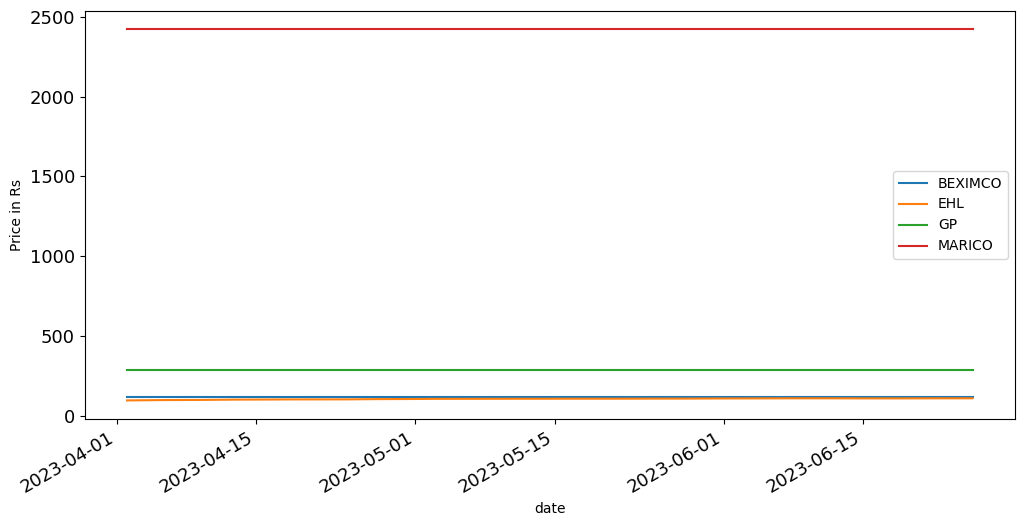

In [121]:
combined_df.rolling(63).mean().plot(figsize=(12, 6), ylabel='Price in Rs', fontsize=13)

In [122]:
combined_df.corr()

,BEXIMCO,EHL,GP,MARICO
BEXIMCO,NaN,NaN,NaN,NaN
EHL,NaN,1.0,NaN,NaN
GP,NaN,NaN,NaN,NaN
MARICO,NaN,NaN,NaN,NaN


In [123]:
combined_df

,BEXIMCO,EHL,GP,MARICO
date,,,,
2023-01-01,115.6,76.7,286.6,2421.5
2023-01-02,115.6,74.7,286.6,2421.5
2023-01-03,115.6,77.1,286.6,2421.5
2023-01-04,115.6,80.0,286.6,2421.5
2023-01-05,115.6,77.9,286.6,2421.5
...,...,...,...,...
2023-06-20,115.6,103.6,286.6,2421.5
2023-06-21,115.6,101.9,286.6,2421.5
2023-06-22,115.6,101.5,286.6,2421.5
